## Import Libraries

In [51]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math



from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## Load the Data

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.shape

(10754, 22)

In [4]:
df.head(2)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [5]:
# uniqeness
df.duplicated().sum()

0

In [6]:
# Completeness
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [7]:
# Accurecy types
df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [8]:
# drop column player we dont need it 
# drop column position becuse we have position_encoded
df.drop('player',axis=1,inplace = True) 
df.drop('position',axis=1,inplace = True)
df.drop('name',axis=1,inplace= True) 
df.dtypes

team                    object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [9]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
# position is alrady encoded

categorical_features = ['team']
numeric_features = ['height', 'age', 'appearance','goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger']

       

In [10]:
for i in categorical_features:
    print (df[i].value_counts())

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64


In [11]:
for i in numeric_features:
    print(df[i].value_counts())


height
180.000000    744
185.000000    608
175.000000    596
178.000000    594
183.000000    572
188.000000    493
184.000000    458
182.000000    449
181.240353    440
186.000000    423
187.000000    419
176.000000    390
177.000000    372
190.000000    371
173.000000    366
179.000000    359
181.000000    355
170.000000    312
191.000000    272
174.000000    270
189.000000    255
172.000000    254
192.000000    203
193.000000    181
171.000000    169
168.000000    124
194.000000    117
169.000000    107
195.000000     98
167.000000     85
196.000000     68
166.000000     44
165.000000     42
197.000000     31
198.000000     24
163.000000     16
160.000000     15
164.000000     14
199.000000     12
200.000000     12
202.000000      6
162.000000      6
161.000000      3
206.000000      2
204.000000      1
156.000000      1
159.000000      1
Name: count, dtype: int64
age
22.000000    841
23.000000    823
26.000000    812
25.000000    772
24.000000    767
21.000000    715
28.000000    67

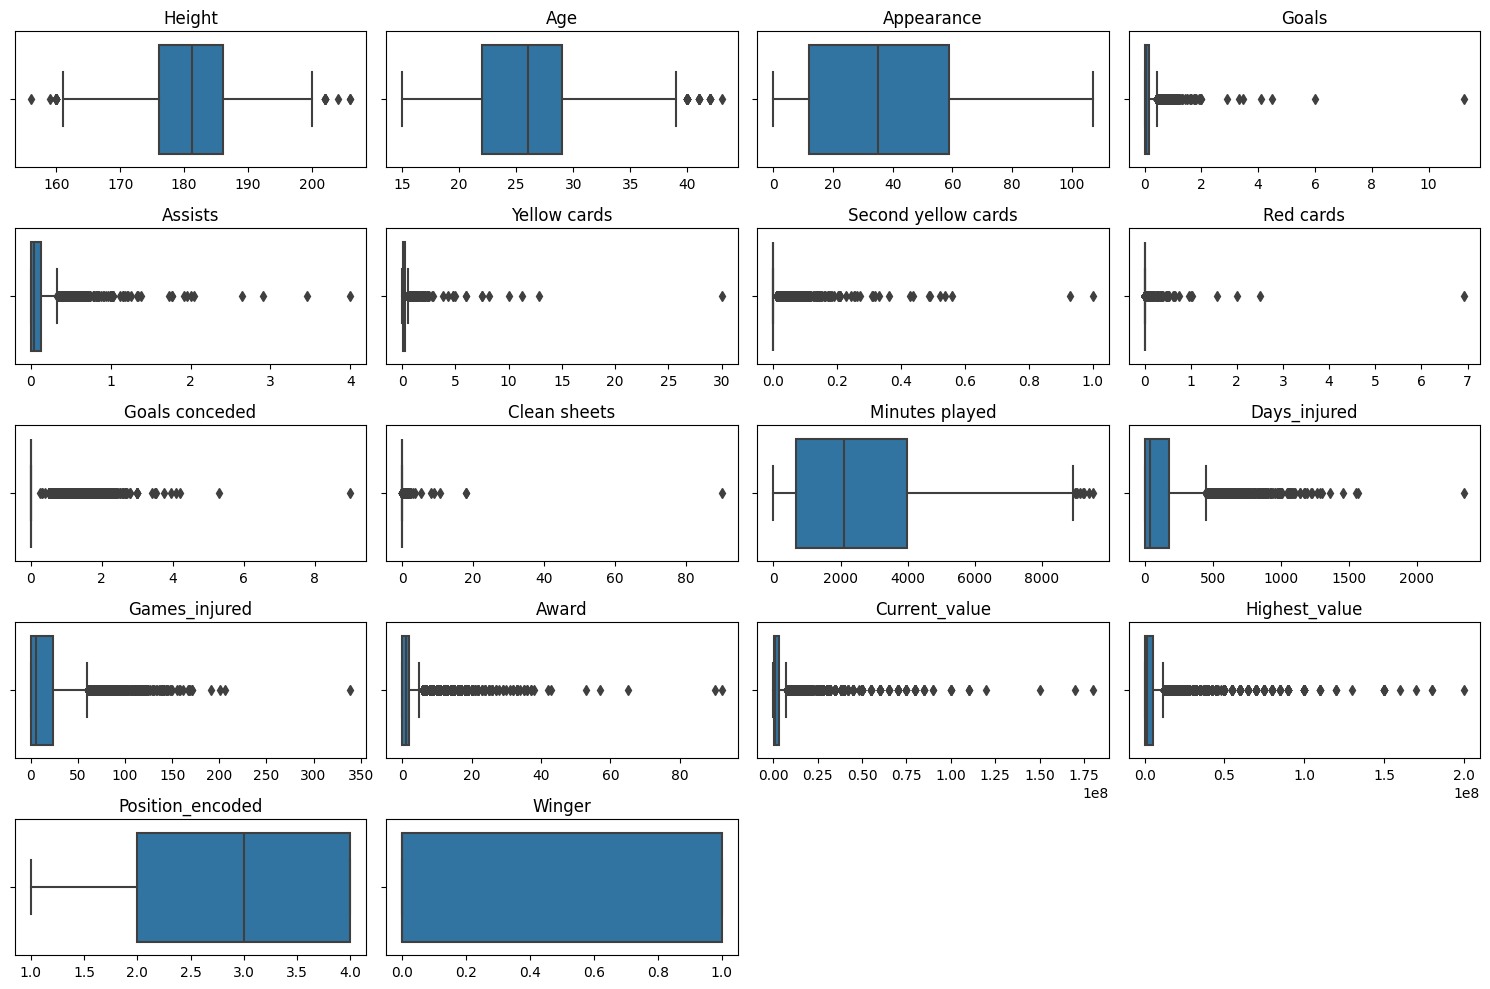

In [12]:
# boxplot for the feature 
num_features = len(numeric_features)

num_rows = math.ceil(num_features / 4)
num_cols = min(4, num_features)

plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(column.capitalize())
    plt.xlabel('')

plt.tight_layout()
plt.show()


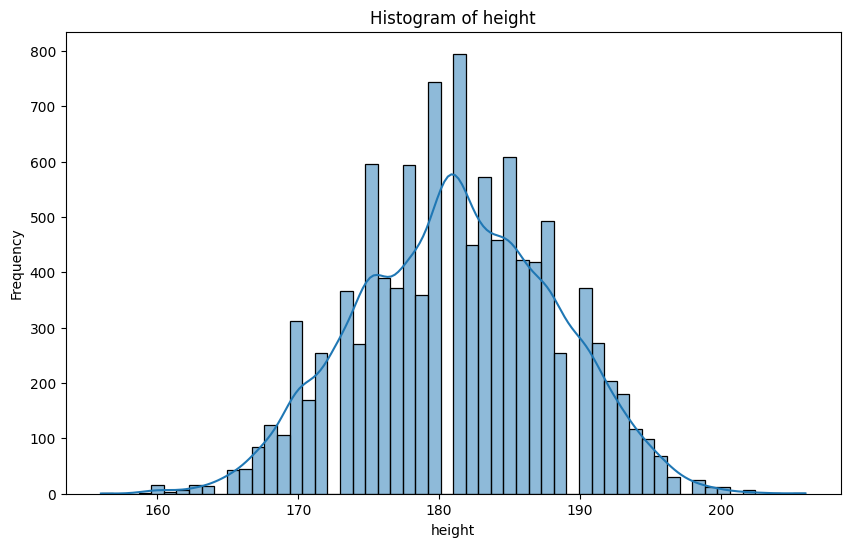

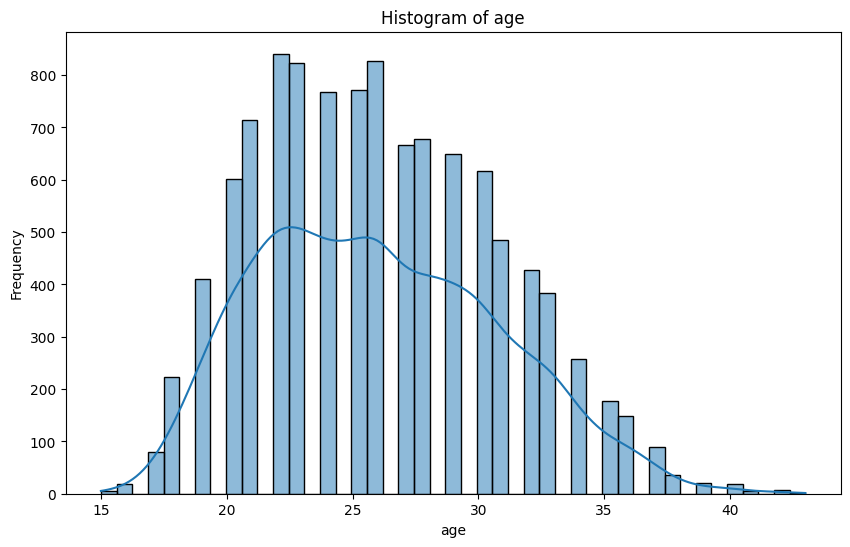

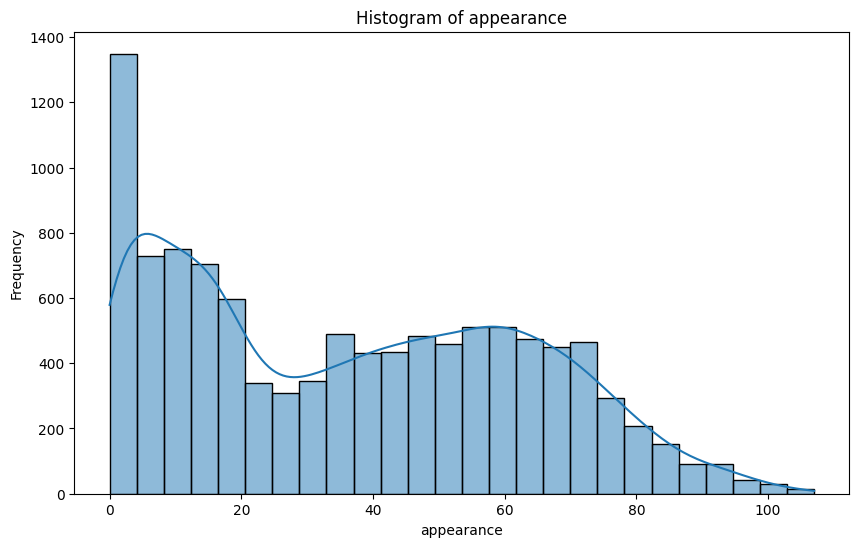

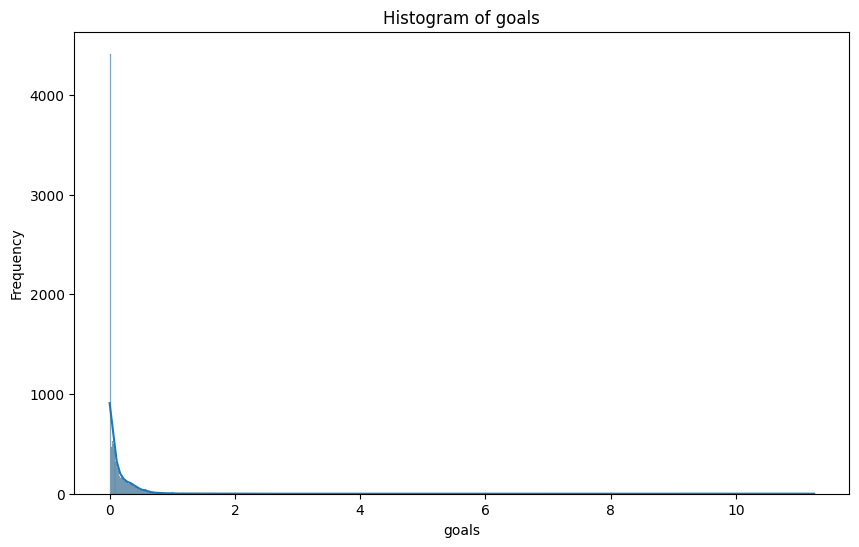

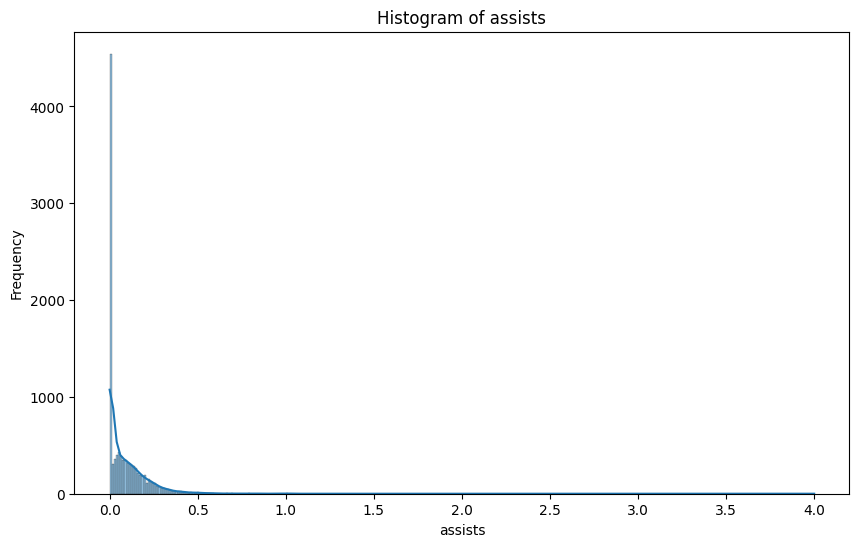

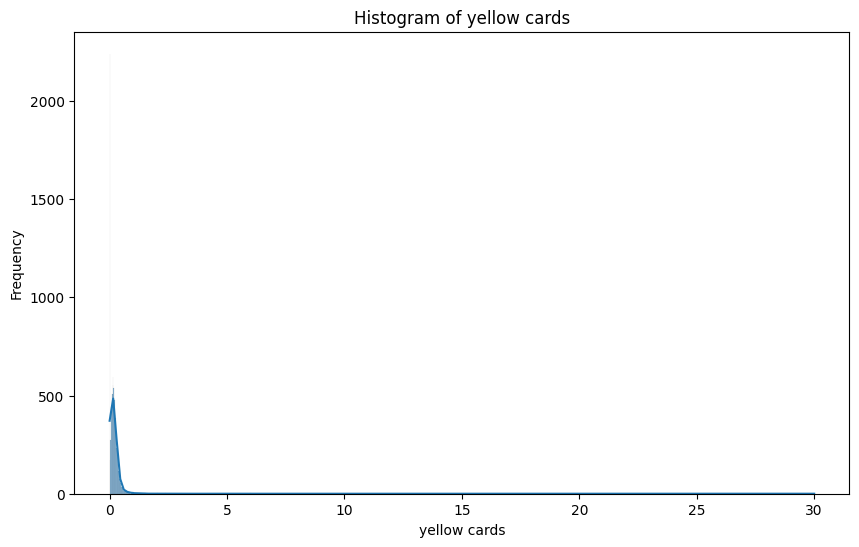

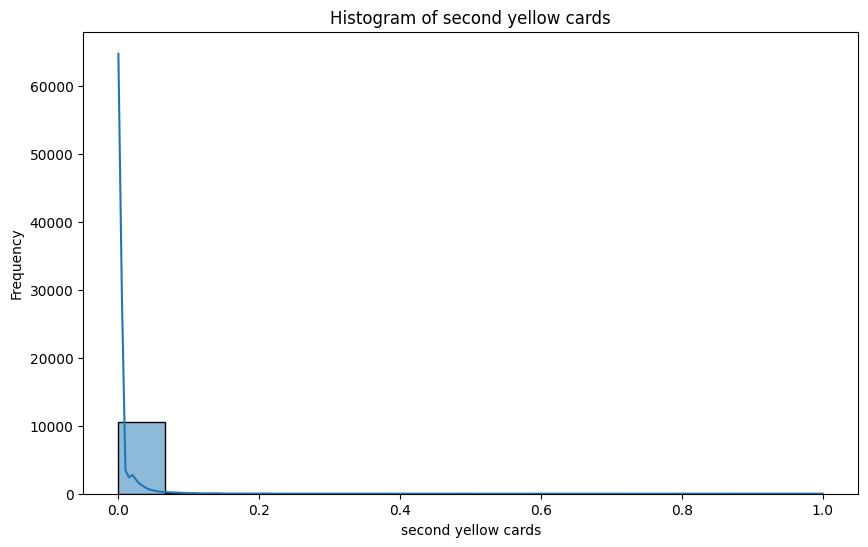

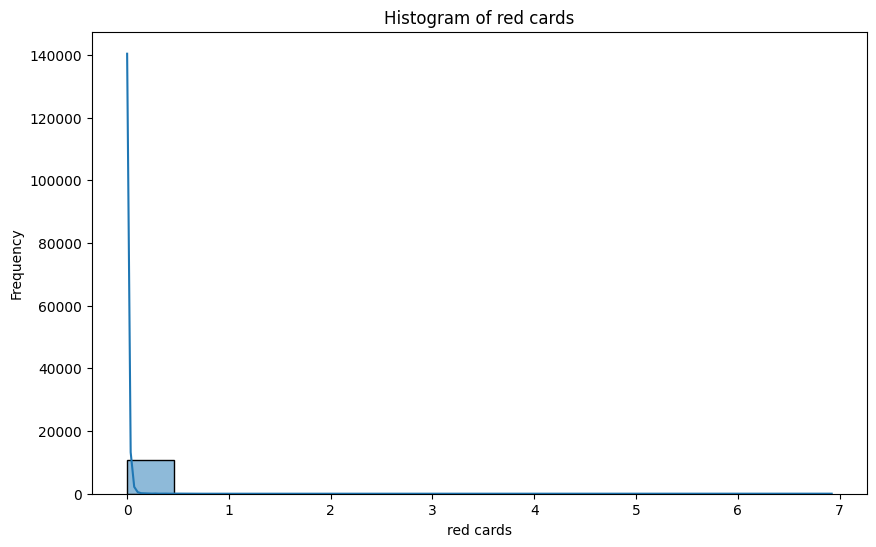

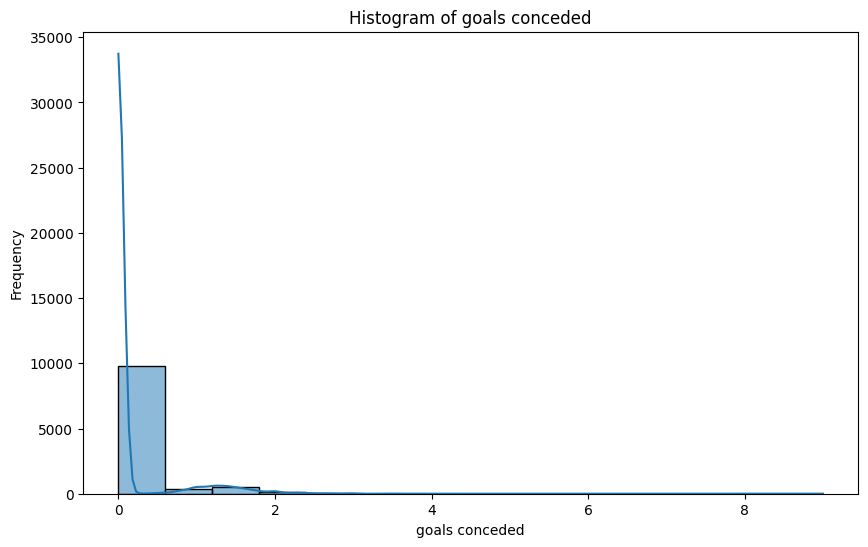

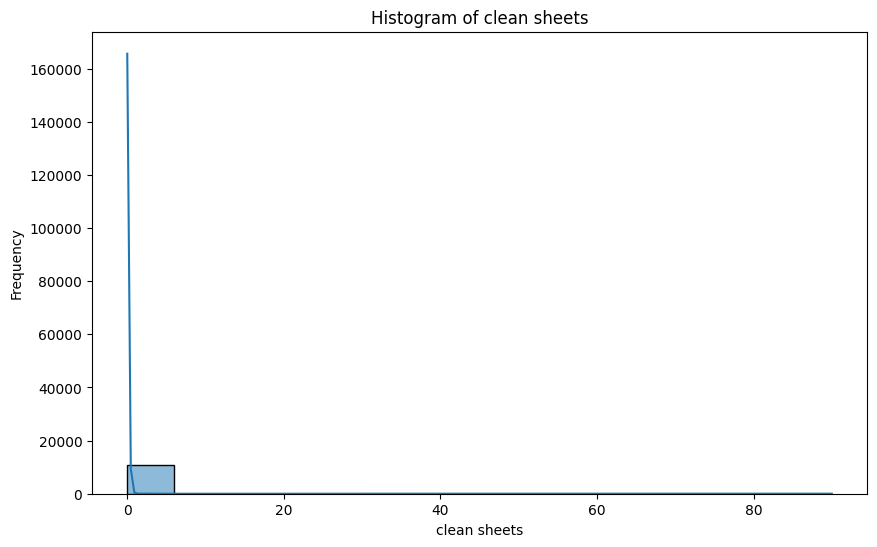

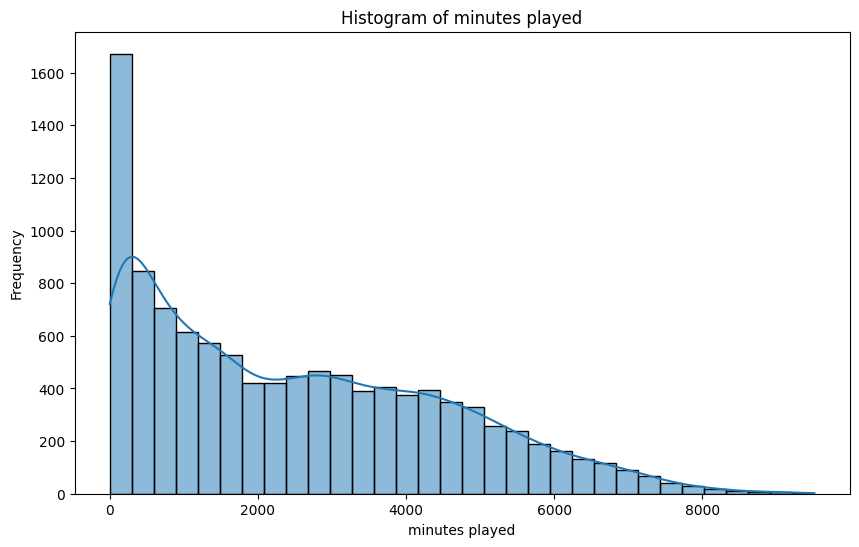

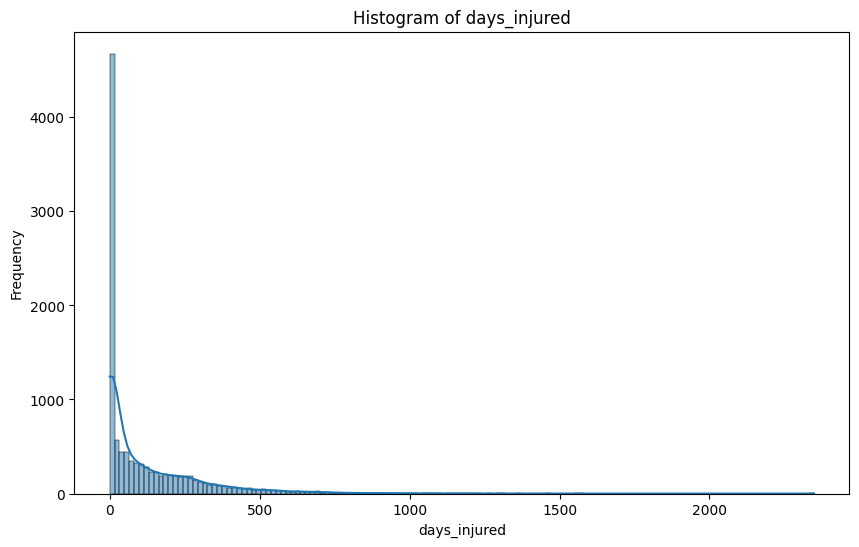

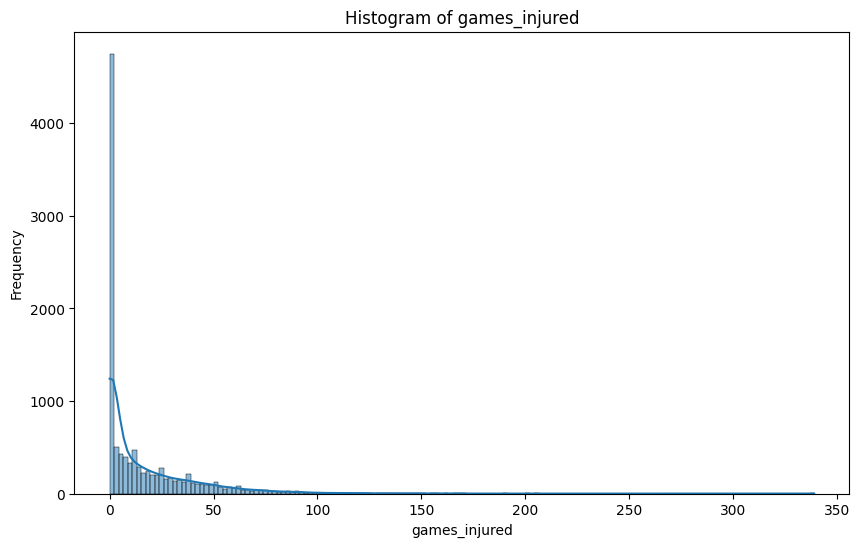

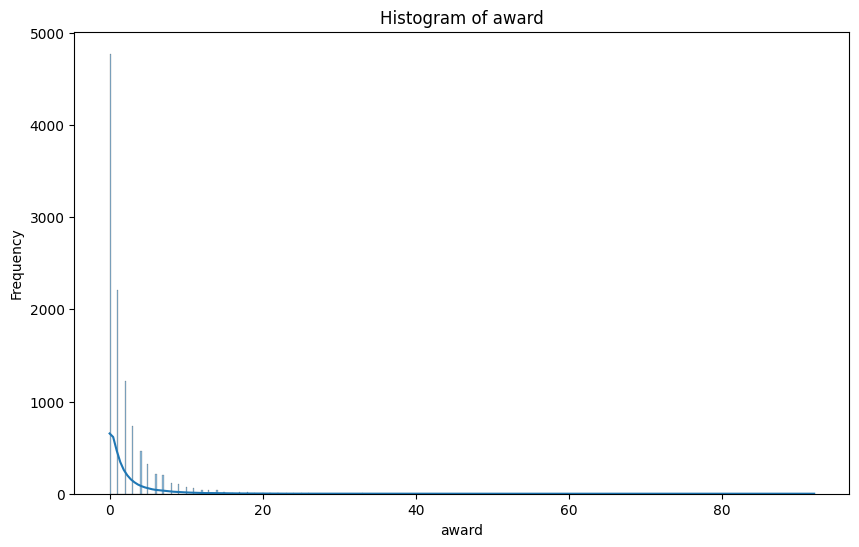

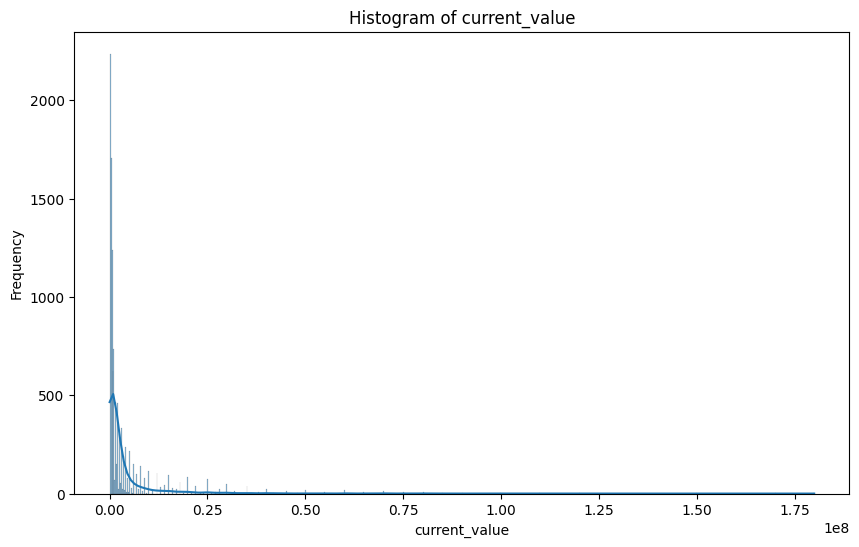

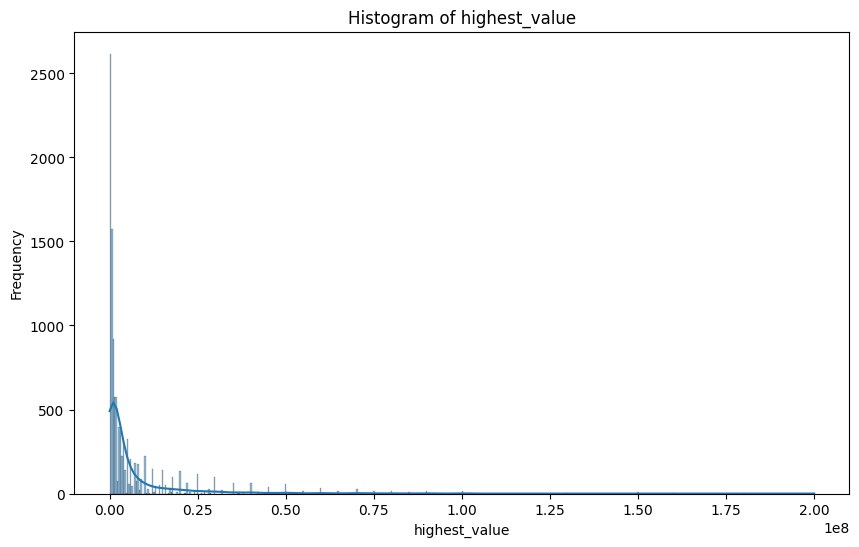

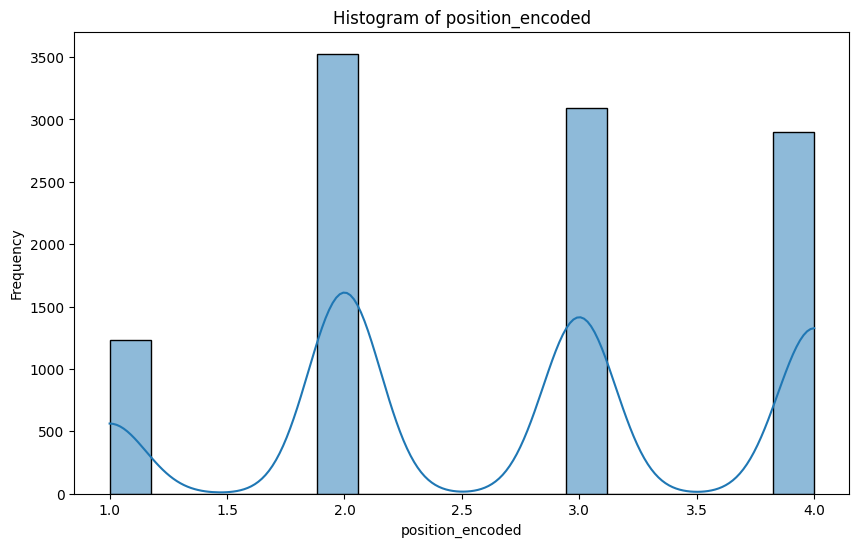

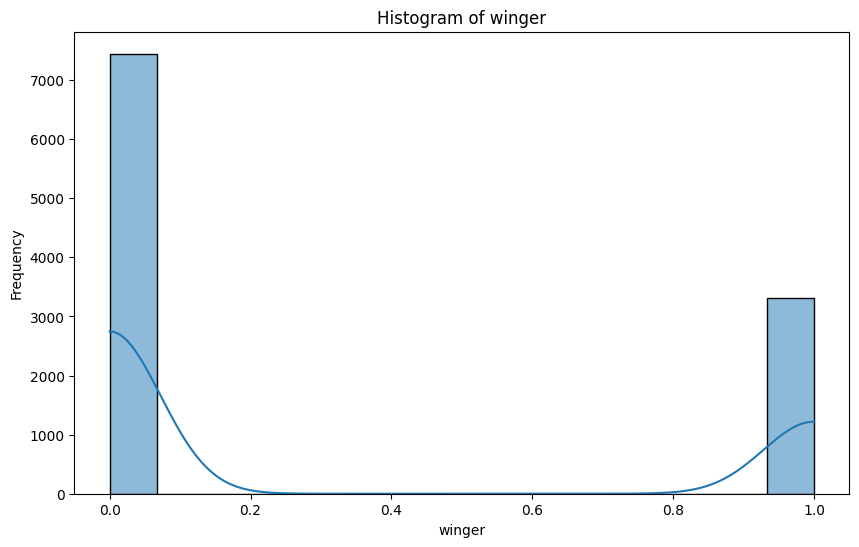

In [13]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)  # kde=True adds the Kernel Density Estimate line
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [14]:
import dtale
#dtale.show(df, open_browser=True)

In [15]:
df.shape

(10754, 19)

In [16]:
df = df[df['age']<40]
df = df[df["appearance"]<100]
df = df[df["goals"]<3]
df = df[df['assists']<4]
df = df[df['yellow cards']<=10]
df = df[df["second yellow cards"]<1]
df = df[df["red cards"]<3]
df = df[df['award']<12]
df = df[df["days_injured"]<800]
df = df[df['games_injured']<100]
df = df[df["minutes played"]<7500]



In [17]:
df.shape

(10247, 19)

In [19]:

fig = px.histogram(df, x='current_value', nbins=100, title='Histogram of Current Value')

fig.show()


#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [20]:
df.head(2)

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,Manchester United,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0


In [21]:
categorical_features

['team']

In [22]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [23]:
df.shape

(10247, 392)

In [24]:
print(df.columns.tolist()) 


['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded', 'winger', 'team_1.FC Köln', 'team_1.FC Union Berlin', 'team_1.FSV Mainz 05', 'team_AA Argentinos Juniors', 'team_AC Ajaccio', 'team_AC Milan', 'team_AC Monza', 'team_ACF Fiorentina', 'team_AFC Bournemouth', 'team_AJ Auxerre', 'team_AS Monaco', 'team_AS Roma', 'team_AZ Alkmaar', 'team_Abha Club', 'team_Adana Demirspor', 'team_Adelaide United', 'team_Ajax Amsterdam', 'team_Akhmat Grozny', 'team_Al-Adalah FC', 'team_Al-Batin FC', 'team_Al-Fateh SC', 'team_Al-Fayha FC', 'team_Al-Hilal Saudi FC', 'team_Al-Ittihad Club (Jeddah)', 'team_Al-Khaleej', 'team_Al-Nassr FC', 'team_Al-Raed SFC', 'team_Al-Shabab Club (Riyadh)', 'team_Al-Taawoun FC', 'team_Al-Tai', 'team_Al-Wehda FC', 'team_Alanyaspor', 'team_Albirex Niigata', 'team_AmaZulu FC', 'team_Am

In [25]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_West Ham United,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor
1,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,False
2,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Calculate the 35th and 75th percentiles of the current_value
p35 = df['current_value'].quantile(0.35)
p75 = df['current_value'].quantile(0.75)

# Function to categorize current_values
def categorize_current_value(current_value):
    if current_value < p35:
        return 'cv_low'
    elif current_value < p75:
        return 'cv_good'
    else:
        return 'cv_high'

# Apply the function to create a new column
df['players_current_value_category'] = df['current_value'].apply(categorize_current_value)

df.drop('current_value', axis=1, inplace=True)

#Verify the distribution of the new categories
print(df['players_current_value_category'].value_counts())

players_current_value_category
cv_good    4240
cv_low     3244
cv_high    2763
Name: count, dtype: int64


In [27]:
p35 ,p75

(400000.0, 2500000.0)

In [28]:
df['players_current_value_category'] 

1        cv_good
2        cv_good
3        cv_high
5        cv_high
6        cv_high
          ...   
10749     cv_low
10750     cv_low
10751     cv_low
10752     cv_low
10753     cv_low
Name: players_current_value_category, Length: 10247, dtype: object

In [29]:
encoder = LabelEncoder()
#pcvc_encoded == players current value category encoded
df['pcvc_encoded'] = encoder.fit_transform(df['players_current_value_category'])  

#### 3. Feature selection

In [30]:
df.drop('players_current_value_category',axis=1,inplace=True)

In [31]:
corrl = df.corr()
#print(corrl['current_value'].sort_values(ascending=False))

print(corrl['pcvc_encoded'].sort_values(ascending=False))

pcvc_encoded               1.000000
goals conceded             0.089529
team_Marumo Gallants FC    0.064941
team_Royal AM FC           0.062463
team_Richards Bay FC       0.061280
                             ...   
days_injured              -0.140315
age                       -0.141969
games_injured             -0.146294
minutes played            -0.221382
appearance                -0.239037
Name: pcvc_encoded, Length: 392, dtype: float64


In [35]:
# Set the correlation threshold
threshold = 0.08

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corrl[abs(corrl['pcvc_encoded']) > threshold]['pcvc_encoded'].index
selected_features

Index(['age', 'appearance', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'position_encoded',
       'pcvc_encoded'],
      dtype='object')

In [36]:
selected_features = ['age', 'appearance', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'position_encoded',
       'pcvc_encoded']

In [37]:
df = df[selected_features]
df.head()

,age,appearance,assists,goals conceded,minutes played,days_injured,games_injured,award,position_encoded,pcvc_encoded
1,30.0,15,0.000000,1.242331,1304,510,58,1,1,0
2,37.0,4,0.000000,0.616438,292,697,84,4,1,0
3,25.0,82,0.056180,0.000000,6408,175,22,9,2,1
5,30.0,68,0.000000,0.000000,4762,148,27,1,2,1
6,28.0,70,0.032901,0.000000,5471,95,19,10,2,1


#### 4. Prepare train and test data

In [38]:
# Prepare data
X = df.drop(['pcvc_encoded'], axis=1)
y = df['pcvc_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X.shape

(10247, 9)

## Buliding the Model

In [43]:
model = LogisticRegression()

## Train the Model

In [44]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Test the Model

In [45]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [46]:
# Each row of the model.coef_ matrix tells you how each feature affects being in the corresponding class versus any other class
coeff_df = pd.DataFrame(model.coef_[2],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,0.229105
appearance,-0.296183
assists,-0.092005
goals conceded,0.106784
minutes played,-0.595361
days_injured,0.204416
games_injured,-0.555553
award,-0.329018
position_encoded,-0.146786


In [47]:
model.coef_

array([[ 2.70305641e-01, -1.09152880e-01,  5.66244845e-03,
        -1.54114052e-06,  7.73417652e-02,  2.50263484e-03,
         2.75695483e-03, -2.06515312e-02,  7.30897376e-02],
       [-4.99410187e-01,  4.05336091e-01,  8.63427810e-02,
        -1.06782605e-01,  5.18019396e-01, -2.06918933e-01,
         5.52796229e-01,  3.49669104e-01,  7.36962205e-02],
       [ 2.29104546e-01, -2.96183210e-01, -9.20052295e-02,
         1.06784146e-01, -5.95361162e-01,  2.04416298e-01,
        -5.55553183e-01, -3.29017572e-01, -1.46785958e-01]])

In [48]:
print(model.intercept_) 

[ 0.53216762 -0.36229236 -0.16987526]


## Evaluating the Model 

In [50]:
# our benchmark model
base_model = round(df['pcvc_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model

26.96

1. Accuracy

In [52]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5917073170731707

In [53]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.5893619616933025

In [54]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[464, 144, 245],
       [167, 326,  42],
       [201,  38, 423]], dtype=int64)

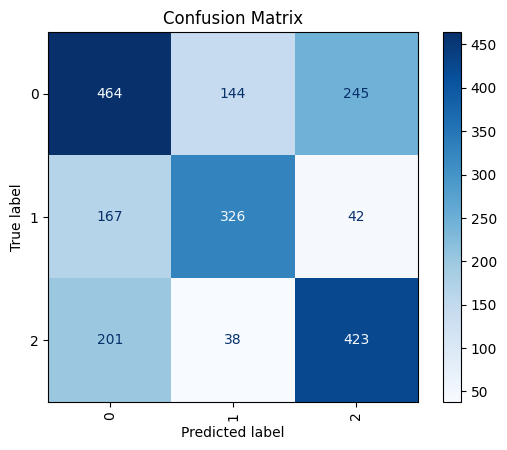

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.60


In [57]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.60


In [58]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.60
